![title](../static/wcar.png)
#  iRNA of RNA Binding Proteins

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee


In [1]:
%load_ext rpy2.ipython
%matplotlib inline

In [2]:
#set up code
import sys
sys.path.append('../')
import utilities as PTUT
#import ProtRank
import warnings
warnings.filterwarnings("ignore")
#define helphttp://localhost:8888/notebooks/calvin/new_data/analysis_427_2018.ipynb#ing function
import os
from tqdm import tqdm_notebook
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from adjustText import adjust_text
from matplotlib.lines import Line2D
from Bio import SeqIO
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
plt.style.use('ggplot')

In [3]:
#pay attention GBR-644 is out of order!!
cols = (['[1] GBR-1-46+1.raw.PG.Quantity',
         '[2] GBR-1-46+2.raw.PG.Quantity',
         '[3] GBR-1-46+3.raw.PG.Quantity']+ 
        ['[4] GBR-1-46-1.raw.PG.Quantity',
         '[5] GBR-1-46-2.raw.PG.Quantity',
         '[6] GBR-1-46-3.raw.PG.Quantity']+ 
        
        ['[7] GBR-6-25+1.raw.PG.Quantity',
         '[8] GBR-6-25+2.raw.PG.Quantity',
         '[9] GBR-6-25+3.raw.PG.Quantity']+
        ['[10] GBR-6-25-1.raw.PG.Quantity',
         '[11] GBR-6-25-2.raw.PG.Quantity',
         '[12] GBR-6-25-3.raw.PG.Quantity']+
        
        ['[13] GBR-6-44+1.raw.PG.Quantity',
         '[41] GBR-644+2.raw.PG.Quantity',
         '[14] GBR-6-44+3.raw.PG.Quantity']+
        
        ['[15] GBR-6-44-1.raw.PG.Quantity',
         '[42] GBR-644-2.raw.PG.Quantity',
         '[16] GBR-6-44-3.raw.PG.Quantity']+
        
        ['[17] GBR-8-27+1.raw.PG.Quantity',
         '[18] GBR-8-27+2.raw.PG.Quantity',
         '[19] GBR-8-27+3.raw.PG.Quantity']+
        ['[20] GBR-8-27-1.raw.PG.Quantity',
         '[21] GBR-8-27-2.raw.PG.Quantity',
         '[22] GBR-8-27-3.raw.PG.Quantity']+

        ['[23] GBR-9-87+1.raw.PG.Quantity',
         '[24] GBR-9-87+2.raw.PG.Quantity',
         '[25] GBR-9-87+3.raw.PG.Quantity']+
        ['[26] GBR-9-87-1.raw.PG.Quantity',
         '[27] GBR-9-87-2.raw.PG.Quantity',
         '[28] GBR-9-87-3.raw.PG.Quantity']+

        ['[29] GBR-10-54+1.raw.PG.Quantity',
         '[30] GBR-10-54+2.raw.PG.Quantity',
         '[31] GBR-10-54+3.raw.PG.Quantity']+
        ['[32] GBR-10-54-1.raw.PG.Quantity',
         '[33] GBR-10-54-2-rpt.raw.PG.Quantity',
         '[34] GBR-10-54-3-rpt.raw.PG.Quantity']+        

        ['[35] GBR-11-4+1.raw.PG.Quantity',
         '[36] GBR-11-4+2.raw.PG.Quantity',
         '[37] GBR-11-4+3.raw.PG.Quantity']+
        ['[38] GBR-11-4-1-repeat.raw.PG.Quantity',
         '[39] GBR-11-4-2.raw.PG.Quantity',
         '[40] GBR-11-4-3.raw.PG.Quantity']+        

        
        ['[43] GBR-Rep-1.raw.PG.Quantity',
         '[44] GBR-Rep-2.raw.PG.Quantity',
         '[45] GBR-Rep-3.raw.PG.Quantity'])
len(cols)

45

In [41]:
df_name = 'Report_Protein_mw_peptides (Pivot).txt.zip'
df = pd.read_csv(df_name,sep='\t')
#list(df.columns)

In [5]:
df.head()

,PG.MolecularWeight,PG.ProteinAccessions,PG.Genes,PG.ProteinDescriptions,PG.ProteinNames,[1] GBR-1-46+1.raw.PG.IsSingleHit,[2] GBR-1-46+2.raw.PG.IsSingleHit,[3] GBR-1-46+3.raw.PG.IsSingleHit,[4] GBR-1-46-1.raw.PG.IsSingleHit,[5] GBR-1-46-2.raw.PG.IsSingleHit,...,[36] GBR-11-4+2.raw.PG.Quantity,[37] GBR-11-4+3.raw.PG.Quantity,[38] GBR-11-4-1-repeat.raw.PG.Quantity,[39] GBR-11-4-2.raw.PG.Quantity,[40] GBR-11-4-3.raw.PG.Quantity,[41] GBR-644+2.raw.PG.Quantity,[42] GBR-644-2.raw.PG.Quantity,[43] GBR-Rep-1.raw.PG.Quantity,[44] GBR-Rep-2.raw.PG.Quantity,[45] GBR-Rep-3.raw.PG.Quantity
0,40776.21,GFP.BLA,NaN,Reporter protein,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2736450,2952524.5,2323748.5,2639608,2457415,17557438,1952851.125,2819019.25,2944748,2795521.25
1,18603.02;18603.02,Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,NaN,transcript=Tb05.5K5.100:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,266765.0938,209550.6563,291057.5625,246405.5,273542.125,246802.3438,316461.1875,291862.0625,262696.9375,262475.625
2,94061.35;94103.43,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,NaN,transcript=Tb05.5K5.110:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,1677594.25,1748376.25,1588898,1631590.125,1665623.625,1587835.375,1686918.5,1685135.125,1630652.25,1829206.75
3,95765.04;95765.04,Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,NaN,transcript=Tb05.5K5.120:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,376211.75,406492.9063,326242.5938,391081.9063,381422.875,464948.6875,504665.8125,373680.25,385303.7188,387422.125
4,68313.98;68313.98,Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,NaN,transcript=Tb05.5K5.130:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2138294.5,2345840.75,2083957,1397410.375,2143545.25,2170055.5,2301813,2160984.5,2056663.125,1634870.625


In [6]:
mask = df[[n.replace('PG.Quantity','PG.IsSingleHit') for n in cols]]
mask.columns = cols
mask=mask.replace('Filtered', True)
mask=mask.replace('FALSE', False)
mask=mask.replace('TRUE', True)
print(mask.shape)
mask.head(5)

(5491, 45)


,[1] GBR-1-46+1.raw.PG.Quantity,[2] GBR-1-46+2.raw.PG.Quantity,[3] GBR-1-46+3.raw.PG.Quantity,[4] GBR-1-46-1.raw.PG.Quantity,[5] GBR-1-46-2.raw.PG.Quantity,[6] GBR-1-46-3.raw.PG.Quantity,[7] GBR-6-25+1.raw.PG.Quantity,[8] GBR-6-25+2.raw.PG.Quantity,[9] GBR-6-25+3.raw.PG.Quantity,[10] GBR-6-25-1.raw.PG.Quantity,...,[34] GBR-10-54-3-rpt.raw.PG.Quantity,[35] GBR-11-4+1.raw.PG.Quantity,[36] GBR-11-4+2.raw.PG.Quantity,[37] GBR-11-4+3.raw.PG.Quantity,[38] GBR-11-4-1-repeat.raw.PG.Quantity,[39] GBR-11-4-2.raw.PG.Quantity,[40] GBR-11-4-3.raw.PG.Quantity,[43] GBR-Rep-1.raw.PG.Quantity,[44] GBR-Rep-2.raw.PG.Quantity,[45] GBR-Rep-3.raw.PG.Quantity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#mask.mask(mask>=1)

In [8]:
selection = df[cols]
selection = selection.mask(mask)
#selection[mask]=np.nan
#selection=selection[selection.isna().sum(axis=1)<=500]
#selection=selection.astype(float)
selection.head(5)

,[1] GBR-1-46+1.raw.PG.Quantity,[2] GBR-1-46+2.raw.PG.Quantity,[3] GBR-1-46+3.raw.PG.Quantity,[4] GBR-1-46-1.raw.PG.Quantity,[5] GBR-1-46-2.raw.PG.Quantity,[6] GBR-1-46-3.raw.PG.Quantity,[7] GBR-6-25+1.raw.PG.Quantity,[8] GBR-6-25+2.raw.PG.Quantity,[9] GBR-6-25+3.raw.PG.Quantity,[10] GBR-6-25-1.raw.PG.Quantity,...,[34] GBR-10-54-3-rpt.raw.PG.Quantity,[35] GBR-11-4+1.raw.PG.Quantity,[36] GBR-11-4+2.raw.PG.Quantity,[37] GBR-11-4+3.raw.PG.Quantity,[38] GBR-11-4-1-repeat.raw.PG.Quantity,[39] GBR-11-4-2.raw.PG.Quantity,[40] GBR-11-4-3.raw.PG.Quantity,[43] GBR-Rep-1.raw.PG.Quantity,[44] GBR-Rep-2.raw.PG.Quantity,[45] GBR-Rep-3.raw.PG.Quantity
0,760068.25,852408,639825.375,2785541.25,3407291.75,2630695.25,10872244,11952819,10796453,2412911,...,2642244,2722660.25,2736450,2952524.5,2323748.5,2639608,2457415,2819019.25,2944748,2795521.25
1,250983.5313,282580.7813,245342.9063,277150.5,329168.5625,296305.1563,244850.7188,83475.02344,332708.125,282473.9375,...,256575.2031,205336.1875,266765.0938,209550.6563,291057.5625,246405.5,273542.125,291862.0625,262696.9375,262475.625
2,1744456.375,1741980.75,1982828.75,1694455.625,1878801,1717725.75,1699627.75,1704730.625,1524186.25,1728590.625,...,1673078.375,1629132,1677594.25,1748376.25,1588898,1631590.125,1665623.625,1685135.125,1630652.25,1829206.75
3,269244.1875,226433.0313,392021.0625,524077.5,578866.375,339511.25,336985.5,359399.375,270280.8438,386792,...,395153.625,423091.0938,376211.75,406492.9063,326242.5938,391081.9063,381422.875,373680.25,385303.7188,387422.125
4,1116758,1382692.125,1397902.25,1745068.875,2106280,1865904.75,1962186.5,1903727.125,1378123.125,2273511,...,1910455.875,2078076.375,2138294.5,2345840.75,2083957,1397410.375,2143545.25,2160984.5,2056663.125,1634870.625


In [9]:
new_cols = [
'P146-1','P146-2','P146-3',
'M146-1','M146-2','M146-3',

'P625-1','P625-2','P625-3',
'M625-1','M625-2','M625-3',

'P644-1','P644-2','P644-3',
'M644-1','M644-2','M644-3',
    
'P827-1','P827-2','P827-3',
'M827-1','M827-2','M827-3',
    
'P987-1','P987-2','P987-3',
'M987-1','M987-2','M987-3',
    
'P1054-1','P1054-2','P1054-3',
'M1054-1','M1054-2','M1054-3',    
    
'P114-1','P114-2','P114-3',
'M114-1','M114-2','M114-3', 
    
'GFPB-1','GFPB-2','GFPB-3', 
]

selection.columns = new_cols
selection = selection.astype(float)



In [10]:
selection = selection.dropna(how='all')
selection.head(20)

,P146-1,P146-2,P146-3,M146-1,M146-2,M146-3,P625-1,P625-2,P625-3,M625-1,...,M1054-3,P114-1,P114-2,P114-3,M114-1,M114-2,M114-3,GFPB-1,GFPB-2,GFPB-3
0,7.600682e+05,8.524080e+05,6.398254e+05,2.785541e+06,3.407292e+06,2.630695e+06,1.087224e+07,1.195282e+07,1.079645e+07,2.412911e+06,...,2.642244e+06,2.722660e+06,2.736450e+06,2.952524e+06,2.323748e+06,2.639608e+06,2.457415e+06,2.819019e+06,2.944748e+06,2.795521e+06
1,2.509835e+05,2.825808e+05,2.453429e+05,2.771505e+05,3.291686e+05,2.963052e+05,2.448507e+05,8.347502e+04,3.327081e+05,2.824739e+05,...,2.565752e+05,2.053362e+05,2.667651e+05,2.095507e+05,2.910576e+05,2.464055e+05,2.735421e+05,2.918621e+05,2.626969e+05,2.624756e+05
2,1.744456e+06,1.741981e+06,1.982829e+06,1.694456e+06,1.878801e+06,1.717726e+06,1.699628e+06,1.704731e+06,1.524186e+06,1.728591e+06,...,1.673078e+06,1.629132e+06,1.677594e+06,1.748376e+06,1.588898e+06,1.631590e+06,1.665624e+06,1.685135e+06,1.630652e+06,1.829207e+06
3,2.692442e+05,2.264330e+05,3.920211e+05,5.240775e+05,5.788664e+05,3.395112e+05,3.369855e+05,3.593994e+05,2.702808e+05,3.867920e+05,...,3.951536e+05,4.230911e+05,3.762118e+05,4.064929e+05,3.262426e+05,3.910819e+05,3.814229e+05,3.736802e+05,3.853037e+05,3.874221e+05
4,1.116758e+06,1.382692e+06,1.397902e+06,1.745069e+06,2.106280e+06,1.865905e+06,1.962186e+06,1.903727e+06,1.378123e+06,2.273511e+06,...,1.910456e+06,2.078076e+06,2.138294e+06,2.345841e+06,2.083957e+06,1.397410e+06,2.143545e+06,2.160984e+06,2.056663e+06,1.634871e+06
5,4.503434e+06,4.535943e+06,4.508826e+06,4.356030e+06,4.280938e+06,4.332757e+06,4.143579e+06,3.322688e+06,4.926647e+06,4.163361e+06,...,3.300210e+06,3.105740e+06,3.473275e+06,3.469968e+06,3.849574e+06,3.438118e+06,3.454672e+06,4.054442e+06,3.775806e+06,3.751425e+06
6,5.787859e+04,6.713331e+04,6.514921e+04,1.000375e+05,1.218212e+05,9.765768e+04,1.712221e+05,2.122998e+05,1.763926e+05,9.252917e+04,...,1.034284e+05,9.185166e+04,8.642521e+04,9.493924e+04,8.507385e+04,9.143232e+04,8.435798e+04,8.709410e+04,8.580957e+04,9.364662e+04
8,1.221323e+05,1.406438e+05,1.068019e+05,1.475198e+05,1.269866e+05,1.310733e+05,1.376798e+05,1.157151e+05,1.570002e+05,1.642138e+05,...,1.454718e+05,1.653315e+05,1.616145e+05,1.559590e+05,1.643257e+05,1.616978e+05,1.644634e+05,1.644693e+05,1.724572e+05,1.575455e+05
9,3.860566e+06,3.855666e+06,4.293599e+06,4.406618e+06,4.531589e+06,4.493853e+06,4.323085e+06,4.969019e+06,4.189076e+06,4.429771e+06,...,3.908261e+06,3.927007e+06,3.914875e+06,3.866382e+06,4.220288e+06,4.261915e+06,4.102181e+06,4.067286e+06,3.881334e+06,3.862086e+06
10,7.661838e+05,8.165163e+05,8.729362e+05,1.090399e+06,1.315062e+06,1.033870e+06,9.238760e+05,1.156895e+06,9.205435e+05,1.077486e+06,...,1.063343e+06,1.028698e+06,1.057266e+06,1.139442e+06,9.947581e+05,1.038393e+06,1.018946e+06,1.033955e+06,8.704178e+05,1.063530e+06


# Missing Values

In [11]:
OUT_FOLDER='E927'
!mkdir -p E927

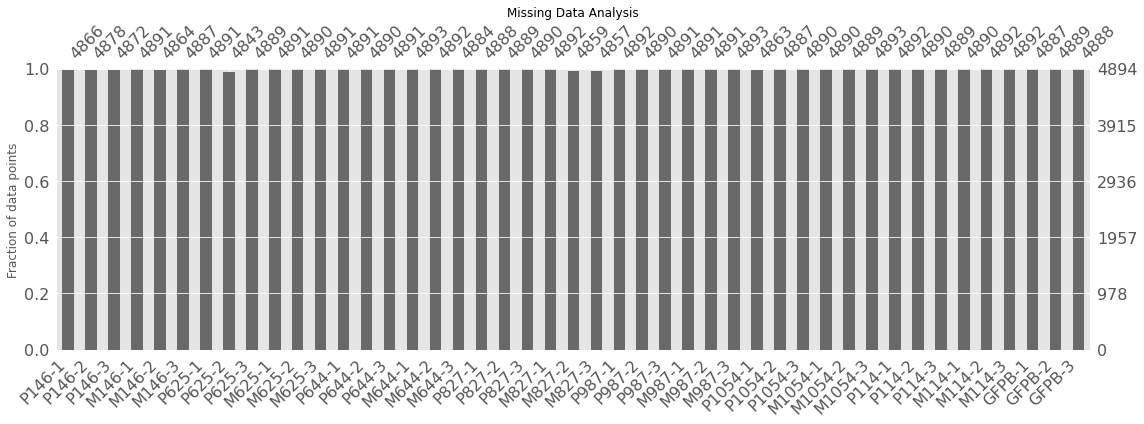

In [12]:
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan), figsize=(16, 6))
plt.title('Missing Data Analysis', size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.savefig(os.path.join(OUT_FOLDER,'1_missing_value_bar.png'))
plt.tight_layout()
plt.show()

In [13]:
palette=['r','r','r','g','g','g']*7+['b']*3
palette_g = ['r','g','b']
color_dictionary = {'r':'Plus','g':'Minus','b':'GFP'}

# Values Distribution

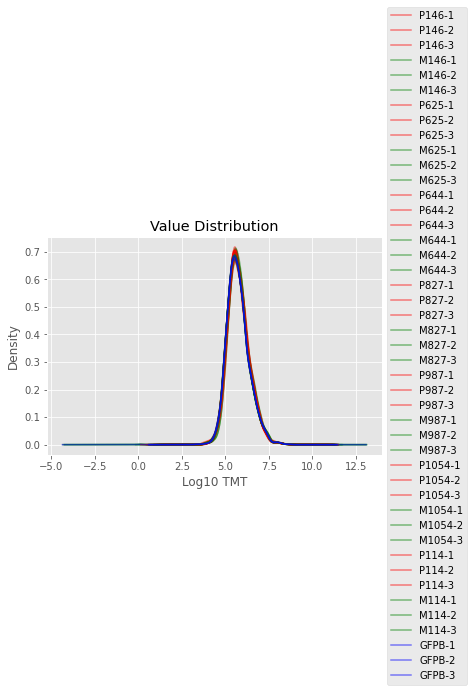

In [14]:
np.log10(selection).plot(kind='kde', color=palette, alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Value Distribution')
plt.xlabel('Log10 TMT')
plt.savefig(os.path.join(OUT_FOLDER,'3_value_distribution_kde.png'))
plt.show()

In [15]:
selection.describe()

,P146-1,P146-2,P146-3,M146-1,M146-2,M146-3,P625-1,P625-2,P625-3,M625-1,...,M1054-3,P114-1,P114-2,P114-3,M114-1,M114-2,M114-3,GFPB-1,GFPB-2,GFPB-3
count,4.866000e+03,4.878000e+03,4.872000e+03,4.891000e+03,4.864000e+03,4.887000e+03,4.891000e+03,4.843000e+03,4.889000e+03,4.891000e+03,...,4.893000e+03,4.892000e+03,4.890000e+03,4.889000e+03,4.890000e+03,4.892000e+03,4.892000e+03,4.887000e+03,4.889000e+03,4.888000e+03
mean,2.225519e+06,2.189339e+06,2.272012e+06,2.271347e+06,2.566352e+06,2.287605e+06,2.189725e+06,2.474643e+06,2.170253e+06,2.276069e+06,...,2.250295e+06,2.269082e+06,2.229773e+06,2.271655e+06,2.244975e+06,2.227685e+06,2.272346e+06,2.303246e+06,2.293254e+06,2.284918e+06
std,1.043272e+07,1.041518e+07,1.105027e+07,1.361912e+07,1.552887e+07,1.407901e+07,1.218884e+07,1.375693e+07,1.267865e+07,1.303153e+07,...,1.309782e+07,1.255595e+07,1.218900e+07,1.224261e+07,1.234904e+07,1.262324e+07,1.245058e+07,1.263921e+07,1.310975e+07,1.337299e+07
min,4.947698e+03,4.881417e+03,5.495729e+03,1.246989e+00,3.823563e+03,6.642548e+03,7.707886e+03,1.996570e+03,3.684298e+03,7.330882e+03,...,3.226976e+03,9.643600e+02,4.560577e+03,4.989715e+03,3.002282e+03,2.422714e+03,4.058272e+03,2.104484e+03,1.994121e+03,1.000000e+00
25%,2.173767e+05,2.138430e+05,2.230525e+05,2.030510e+05,2.147508e+05,1.954937e+05,2.042121e+05,2.216102e+05,1.961507e+05,2.020608e+05,...,1.978471e+05,2.004793e+05,1.949355e+05,1.996915e+05,1.975521e+05,1.919073e+05,1.995784e+05,1.988239e+05,1.952697e+05,1.962790e+05
50%,4.865065e+05,4.841205e+05,5.032540e+05,4.695142e+05,5.162135e+05,4.600274e+05,4.710028e+05,5.316191e+05,4.582135e+05,4.718567e+05,...,4.630797e+05,4.681431e+05,4.594112e+05,4.693208e+05,4.585236e+05,4.548930e+05,4.632712e+05,4.563383e+05,4.595536e+05,4.641584e+05
75%,1.360771e+06,1.348102e+06,1.419350e+06,1.244570e+06,1.325831e+06,1.203259e+06,1.244774e+06,1.370792e+06,1.209303e+06,1.242834e+06,...,1.219273e+06,1.260058e+06,1.214629e+06,1.264252e+06,1.196452e+06,1.189025e+06,1.222276e+06,1.212796e+06,1.211582e+06,1.219416e+06
max,3.061700e+08,3.040517e+08,3.410236e+08,6.052516e+08,6.989142e+08,6.205225e+08,4.940341e+08,5.706453e+08,5.526961e+08,5.209428e+08,...,5.409887e+08,4.647599e+08,4.849141e+08,4.288684e+08,4.874720e+08,5.010340e+08,5.002087e+08,5.001125e+08,5.253546e+08,5.320051e+08


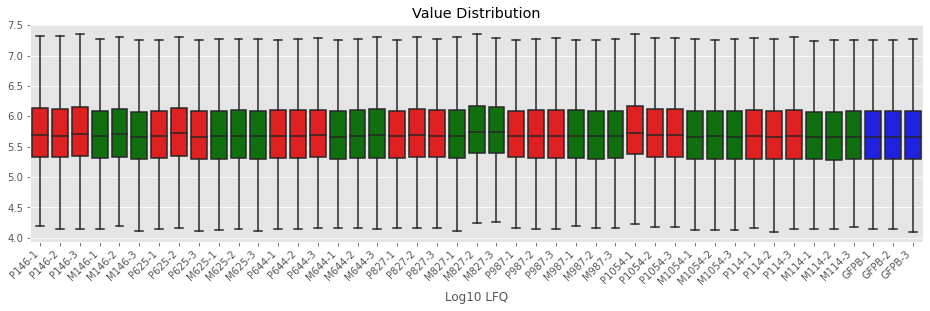

In [16]:
fig,ax=plt.subplots(figsize=(16,4))
sns.boxplot(data = np.log10(selection), showfliers=False, palette=palette,ax=ax)
plt.title('Value Distribution')
plt.xlabel('Log10 LFQ')
plt.xticks(rotation=45,ha='right')
plt.savefig(os.path.join(OUT_FOLDER,'4_value_distribution_box.png'))
plt.show()

# MDS

[0.87363904 0.03006636]
{'r': 'Plus', 'g': 'Minus', 'b': 'GFP'}


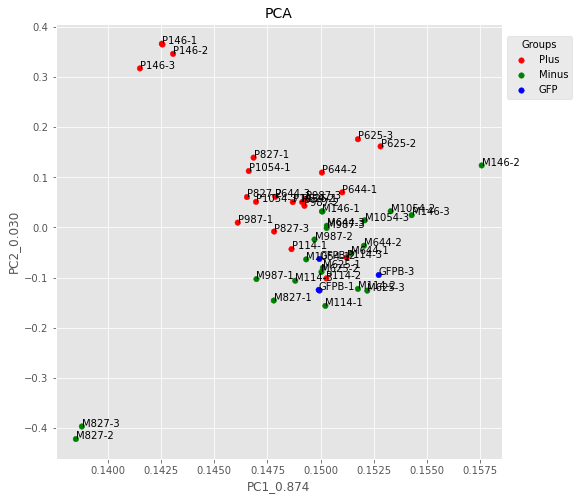

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

ax = PTUT.make_pca(np.log2(selection).dropna(), palette, ax, top=500,
                   color_dictionary=color_dictionary)
plt.savefig(os.path.join(OUT_FOLDER,'5_mds.png')) 


# Equalize Median

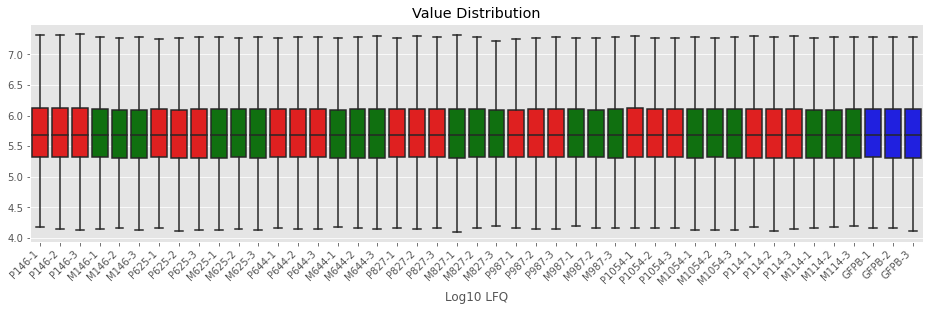

In [18]:
#https://codereview.stackexchange.com/questions/25417/is-there-a-better-way-to-make-a-function-silent-on-need
class NoStdStreams(object):
    def __init__(self, stdout = None, stderr = None):
        self.devnull = open(os.devnull,'w')
        self._stdout = stdout or self.devnull or sys.stdout
        self._stderr = stderr or self.devnull or sys.stderr

    def __enter__(self):
        self.old_stdout, self.old_stderr = sys.stdout, sys.stderr
        self.old_stdout.flush(); self.old_stderr.flush()
        sys.stdout, sys.stderr = self._stdout, self._stderr

    def __exit__(self, exc_type, exc_value, traceback):
        self._stdout.flush(); self._stderr.flush()
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr
        self.devnull.close()

with NoStdStreams():
   selection_normed = PTUT.norm_loading(selection)

fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data =np.log10(selection_normed),showfliers=False,palette=palette,ax=ax)
plt.title('Value Distribution')
plt.xlabel('Log10 LFQ')
plt.xticks(rotation=45,ha='right')
plt.savefig(os.path.join(OUT_FOLDER,'6_value_distribution_box.png'))
plt.show()

# Log Transform

In [19]:
selection_normed=np.log2(selection_normed)

new_cols = [
'P146-1','P146-2','P146-3',
'M146-1','M146-2','M146-3',

'P625-1','P625-2','P625-3',
'M625-1','M625-2','M625-3',

'P644-1','P644-2','P644-3',
'M644-1','M644-2','M644-3',
    
'P827-1','P827-2','P827-3',
'M827-1','M827-2','M827-3',
    
'P987-1','P987-2','P987-3',
'M987-1','M987-2','M987-3',
    
'P1054-1','P1054-2','P1054-3',
'M1054-1','M1054-2','M1054-3',    
    
'P114-1','P114-2','P114-3',
'M114-1','M114-2','M114-3', 
    
'GFPB-1','GFPB-2','GFPB-3', 
]

# Subselection CFB2

In [20]:
selection_normed_146 = selection_normed[['P146-1','P146-2','P146-3','M146-1','M146-2','M146-3']]

## Missing Values

<AxesSubplot:>

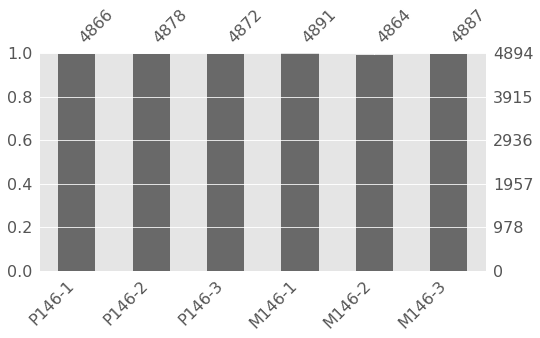

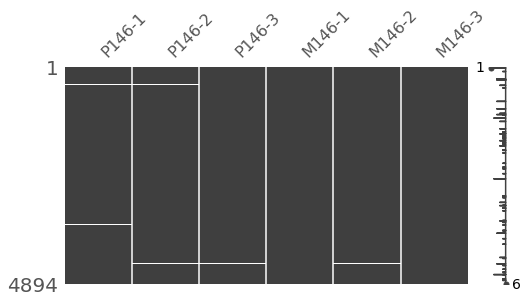

In [21]:
msno.bar(selection_normed_146, figsize=(8, 4))
msno.matrix(selection_normed_146 , figsize=(8, 4))

In [22]:
selection_normed_146['isna']=selection_normed_146.isna().sum(axis=1)
selection_normed_146['isna'].value_counts()

0    4827
1      44
2      12
3       7
4       3
5       1
Name: isna, dtype: int64

In [23]:
selection_normed_146[selection_normed_146['isna']>=3].join(df[['PG.ProteinAccessions']])

,P146-1,P146-2,P146-3,M146-1,M146-2,M146-3,isna,PG.ProteinAccessions
36,NaN,NaN,NaN,16.381040,NaN,NaN,5,Tb09.v4.0119:pseudogenic_transcript-p1
326,NaN,NaN,13.170580,NaN,12.818707,12.760866,3,Tb427.BES122.1
354,16.108353,NaN,NaN,16.244868,15.853294,NaN,3,Tb427.BES51.2
891,NaN,NaN,NaN,16.852017,17.095592,16.369025,3,Tb927.10.15810:mRNA-p1
1077,NaN,16.409829,NaN,15.881833,18.840995,NaN,3,Tb927.10.4080:mRNA-p1
1223,16.533932,16.463189,16.329570,NaN,NaN,NaN,3,Tb927.10.6740:mRNA-p1
1306,NaN,15.643433,NaN,NaN,NaN,14.724641,4,Tb927.10.7890:mRNA-p1
2826,14.713681,NaN,NaN,0.366197,NaN,NaN,4,Tb927.3.1450:mRNA-p1;Tb927.3.1530:mRNA-p1
4185,NaN,NaN,16.762162,18.592642,NaN,17.309577,3,Tb927.7.3400:mRNA-p1
4960,13.088693,NaN,NaN,16.429768,NaN,15.430759,3,Tb927.8.940:mRNA-p1;Tb927.8.960:mRNA-p1


In [24]:
CFB2_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.1.4650:')].index.values[0]
TRRM2_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.6.2550:')].index.values[0]
RBP42_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.6.4440:')].index.values[0]

RBP10_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.8.2780:')].index.values[0]
DRBD3_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.9.8740:')].index.values[0]
SUB2_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.10.540:')].index.values[0]
PSP1_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.11.14750:')].index.values[0]


DRBD17_index =df[df['PG.ProteinAccessions'].str.contains('Tb927.8.710:')].index.values[0] 

GFP_index = 0

In [25]:
print(selection_normed_146.shape)
selection_normed_146=selection_normed_146[selection_normed_146['isna']<=3]
print(selection_normed_146.shape)
selection_normed_146.drop(['isna'],inplace=True,axis=1)

(4894, 7)
(4890, 7)


## fill missing CFB2

In [26]:
%%R -i selection_normed_146
set.seed(81)
options(warn=-1)
library("missForest")
library("doParallel")
registerDoParallel(cores=4)
imputed_selection_normed <- missForest(selection_normed_146, 
                                       ntree = 20, 
                                       parallelize = "forests",
                                      replace=TRUE)$ximp

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!


In [27]:
%R -o imputed_selection_normed
imputed_selection_normed.index = selection_normed_146.index.values
imputed_selection_normed.head(20)

,P146.1,P146.2,P146.3,M146.1,M146.2,M146.3
0,19.518375,19.690883,19.221097,21.443422,21.597291,21.390358
1,17.919839,18.098002,17.838218,18.114206,18.225564,18.240069
2,20.716952,20.721996,20.852907,20.726287,20.738478,20.775413
3,18.021161,17.778423,18.514350,19.033317,19.039968,18.436445
4,20.073491,20.388747,20.348610,20.768749,20.903363,20.894789
5,22.085200,22.102670,22.038099,22.088479,21.926592,22.110199
6,15.803348,16.024440,15.925238,16.644078,16.791503,16.638791
8,16.880691,17.091385,16.638356,17.204445,16.851413,17.063360
9,21.862987,21.868247,21.967534,22.105137,22.008682,22.162866
10,19.529937,19.628821,19.669295,20.090321,20.223796,20.042968


In [28]:
selection_normed_146[selection_normed_146.isna().sum(axis=1)>1]

,P146-1,P146-2,P146-3,M146-1,M146-2,M146-3
326,NaN,NaN,13.170580,NaN,12.818707,12.760866
345,14.908907,NaN,NaN,15.583058,15.870521,15.396981
354,16.108353,NaN,NaN,16.244868,15.853294,NaN
493,NaN,NaN,22.840593,21.877969,21.672334,18.182632
891,NaN,NaN,NaN,16.852017,17.095592,16.369025
1077,NaN,16.409829,NaN,15.881833,18.840995,NaN
1193,14.394234,15.118530,NaN,15.507419,NaN,15.284040
1223,16.533932,16.463189,16.329570,NaN,NaN,NaN
1384,17.705476,17.898743,NaN,17.292330,NaN,17.420482
1563,NaN,NaN,14.119987,12.899576,13.339274,14.238762


In [29]:
imputed_selection_normed.loc[selection_normed_146[selection_normed_146.isna().sum(axis=1)>1].index]

,P146.1,P146.2,P146.3,M146.1,M146.2,M146.3
326,13.582397,13.373978,13.170580,13.371768,12.818707,12.760866
345,14.908907,15.363764,15.458952,15.583058,15.870521,15.396981
354,16.108353,16.035347,15.956754,16.244868,15.853294,16.193609
493,22.028080,22.255137,22.840593,21.877969,21.672334,18.182632
891,17.239014,17.190634,16.897401,16.852017,17.095592,16.369025
1077,16.848582,16.409829,16.890495,15.881833,18.840995,16.334285
1193,14.394234,15.118530,14.913744,15.507419,14.993295,15.284040
1223,16.533932,16.463189,16.329570,17.046462,16.952214,17.220524
1384,17.705476,17.898743,17.752904,17.292330,17.542332,17.420482
1563,15.183085,14.107068,14.119987,12.899576,13.339274,14.238762


In [30]:
selection_normed_146.mean()

P146-1    19.119499
P146-2    19.085305
P146-3    19.080303
M146-1    19.086671
M146-2    19.040789
M146-3    19.072701
dtype: float64

## test CFB2

In [31]:
%%R -i imputed_selection_normed
options(warn=-1)
library("limma")

f<- factor(c(rep("P146",3),rep("M146",3))
           
           ,levels=c("P146","M146"))

design<- model.matrix(~0+f)
colnames(design)<- c("P146","M146")

#block <- c(1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3)
#block <- c(1,1,2,2,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3)

#dupcor <- duplicateCorrelation(imputed_X, design, block=block)

#https://support.bioconductor.org/p/77093/
#fit2<- lmFit(imputed_X, design, block=block, correlation=dupcor$consensus)
fit2<- lmFit(imputed_selection_normed, design)
contrast.matrix<- makeContrasts("P146-M146",
                                levels=design)

fit2<- contrasts.fit(fit2, contrast.matrix)
fit2<- eBayes(fit2)

tt_limma_1 <- topTable(fit2, coef = 1, sort.by = "none", number = Inf)


In [32]:
%R -o tt_limma_1
tt_limma_1.index = imputed_selection_normed.index.values
tt_limma_1.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,-2.000239,20.476904,-13.899914,0.000012,0.001077,4.136615
1,-0.241260,18.072650,-2.400364,0.055162,0.119289,-5.124766
2,0.017226,20.755339,0.214797,0.837356,0.889092,-7.428930
3,-0.731932,18.470611,-2.860071,0.030279,0.077840,-4.486445
4,-0.585351,20.562958,-5.121558,0.002484,0.013098,-1.719591


## Visualize test

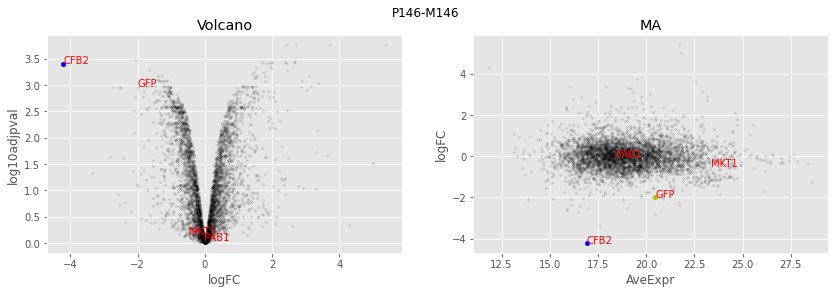

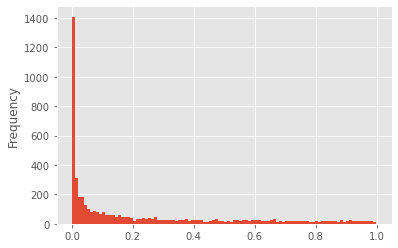

In [33]:

pval_col = 'log10pval'
pval_col = 'log10adjpval'

MKT1_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.6.4770:')].index.values[0]
PAB1_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.8.4540:')].index.values[0]
CFB2_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.1.4650:')].index.values[0]
GFP_index = 0

for table,name,p_index,p_id in zip([tt_limma_1],
                      
                 ["P146-M146"] ,
                             
                  [CFB2_index],
                  
                ['Tb927.1.4650'],                                
                                
                     
                     ):

    
    fig,axes=plt.subplots(figsize=(14,4), ncols=2, nrows=1)
    ax=axes[0]
    table['log10pval']=-np.log10(table['P.Value'])
    table['log10adjpval']=-np.log10(table['adj.P.Val'])
    
    table.plot(x='logFC',y=pval_col,
           kind='scatter',s=5, alpha=0.1, ax=ax, c='black')
    
    
    table.loc[[p_index]].plot(x='logFC',y=pval_col,
           kind='scatter',s=20,alpha=1,ax=ax,c='blue')
    #table.loc[[PAB1_index]].plot(x='logFC',y='log10pval',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='red')
    #table.loc[[DRBD17_index]].plot(x='logFC',y='log10pval',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='green')
    #table.loc[[DRBD17_index]].plot(x='logFC',y=pval_col,
    #       kind='scatter',s=20,alpha=1,ax=ax,c='y')


    
    texts = [ax.text(table.loc[i]['logFC'], 
                       table.loc[i][pval_col],
                       ['CFB2', 'MKT1','PAB1','GFP'][p], c='r')
                       for p,i in enumerate([p_index,MKT1_index,PAB1_index,GFP_index])]


    
    #ax.set_xlim(-4,4)
    ax.set_title('Volcano')
    ax=axes[1]
    table.plot(x='AveExpr',y='logFC',
           kind='scatter',s=5,alpha=0.1,ax=ax,c='black')
    
    table.loc[[p_index]].plot(x='AveExpr',y='logFC',
           kind='scatter',s=20,alpha=1,ax=ax,c='blue')
    #table.loc[[PAB1_index]].plot(x='AveExpr',y='logFC',
     #      kind='scatter',s=20,alpha=1,ax=ax,c='red')
    #table.loc[[DRBD17_index]].plot(x='AveExpr',y='logFC',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='green')
    table.loc[[GFP_index]].plot(x='AveExpr',y='logFC',
           kind='scatter',s=20,alpha=1,ax=ax,c='y')

    
    
    texts = [ax.text(table.loc[i]['AveExpr'], 
                       table.loc[i]['logFC'],
                       ['CFB2', 'MKT1','PAB1','GFP'][p], c='r',fontsize=10)
                       for p,i in enumerate([p_index,MKT1_index,PAB1_index,GFP_index])]


    
    
    
    #ax.set_ylim(-4,4)
    ax.set_title('MA')
    plt.suptitle(name)
    plt.savefig(os.path.join(OUT_FOLDER,'prot_volcano_ma_'+name+'.png'))
    plt.show()
    
    table['P.Value'].plot(kind='hist',bins=100)
    plt.show()

In [34]:

tt_limma_1.columns = ["P146-M146_"+n for n in tt_limma_1.columns]

all_df = pd.concat([df,tt_limma_1],axis=1)
all_df.head(10)

,PG.MolecularWeight,PG.ProteinAccessions,PG.Genes,PG.ProteinDescriptions,PG.ProteinNames,[1] GBR-1-46+1.raw.PG.IsSingleHit,[2] GBR-1-46+2.raw.PG.IsSingleHit,[3] GBR-1-46+3.raw.PG.IsSingleHit,[4] GBR-1-46-1.raw.PG.IsSingleHit,[5] GBR-1-46-2.raw.PG.IsSingleHit,...,[44] GBR-Rep-2.raw.PG.Quantity,[45] GBR-Rep-3.raw.PG.Quantity,P146-M146_logFC,P146-M146_AveExpr,P146-M146_t,P146-M146_P.Value,P146-M146_adj.P.Val,P146-M146_B,P146-M146_log10pval,P146-M146_log10adjpval
0,40776.21,GFP.BLA,NaN,Reporter protein,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2944748,2795521.25,-2.000239,20.476904,-13.899914,0.000012,0.001077,4.136615,4.909099,2.967978
1,18603.02;18603.02,Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,NaN,transcript=Tb05.5K5.100:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,262696.9375,262475.625,-0.241260,18.072650,-2.400364,0.055162,0.119289,-5.124766,1.258360,0.923399
2,94061.35;94103.43,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,NaN,transcript=Tb05.5K5.110:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,1630652.25,1829206.75,0.017226,20.755339,0.214797,0.837356,0.889092,-7.428930,0.077090,0.051053
3,95765.04;95765.04,Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,NaN,transcript=Tb05.5K5.120:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,385303.7188,387422.125,-0.731932,18.470611,-2.860071,0.030279,0.077840,-4.486445,1.518854,1.108799
4,68313.98;68313.98,Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,NaN,transcript=Tb05.5K5.130:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2056663.125,1634870.625,-0.585351,20.562958,-5.121558,0.002484,0.013098,-1.719591,2.604899,1.882792
5,21771.26;21771.26,Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,NaN,transcript=Tb05.5K5.150:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,3775805.5,3751424.75,0.033566,22.058540,0.387670,0.712233,0.791550,-7.369005,0.147378,0.101521
6,108202.16;108202.16,Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1,NaN,transcript=Tb05.5K5.160:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,85809.57031,93646.625,-0.773782,16.304566,-7.941021,0.000265,0.003444,0.793070,3.577063,2.462942
7,29576.31;28980.58,Tb05.5K5.170:mRNA-p1;Tb927.5.4530:mRNA-p1,NaN,transcript=Tb05.5K5.170:mRNA | gene=Tb05.5K5.1...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,...,520356.8125,504784.4375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,48697.02;36427.76,Tb05.5K5.20:mRNA-p1;Tb927.5.4360:mRNA-p1,NaN,transcript=Tb05.5K5.20:mRNA | gene=Tb05.5K5.20...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,172457.1563,157545.5313,-0.169596,16.954942,-1.090622,0.319114,0.440561,-6.823443,0.496055,0.355994
9,55321.5;55321.5;55321.5,Tb05.5K5.200:mRNA-p1;Tb11.v5.0409.1-p1;Tb927.5...,NaN,transcript=Tb05.5K5.200:mRNA | gene=Tb05.5K5.2...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,3881333.5,3862085.5,-0.192639,21.995909,-2.283806,0.064464,0.134161,-5.287582,1.190685,0.872372


In [35]:
list(all_df.columns)

['PG.MolecularWeight',
 'PG.ProteinAccessions',
 'PG.Genes',
 'PG.ProteinDescriptions',
 'PG.ProteinNames',
 '[1] GBR-1-46+1.raw.PG.IsSingleHit',
 '[2] GBR-1-46+2.raw.PG.IsSingleHit',
 '[3] GBR-1-46+3.raw.PG.IsSingleHit',
 '[4] GBR-1-46-1.raw.PG.IsSingleHit',
 '[5] GBR-1-46-2.raw.PG.IsSingleHit',
 '[6] GBR-1-46-3.raw.PG.IsSingleHit',
 '[7] GBR-6-25+1.raw.PG.IsSingleHit',
 '[8] GBR-6-25+2.raw.PG.IsSingleHit',
 '[9] GBR-6-25+3.raw.PG.IsSingleHit',
 '[10] GBR-6-25-1.raw.PG.IsSingleHit',
 '[11] GBR-6-25-2.raw.PG.IsSingleHit',
 '[12] GBR-6-25-3.raw.PG.IsSingleHit',
 '[13] GBR-6-44+1.raw.PG.IsSingleHit',
 '[14] GBR-6-44+3.raw.PG.IsSingleHit',
 '[15] GBR-6-44-1.raw.PG.IsSingleHit',
 '[16] GBR-6-44-3.raw.PG.IsSingleHit',
 '[17] GBR-8-27+1.raw.PG.IsSingleHit',
 '[18] GBR-8-27+2.raw.PG.IsSingleHit',
 '[19] GBR-8-27+3.raw.PG.IsSingleHit',
 '[20] GBR-8-27-1.raw.PG.IsSingleHit',
 '[21] GBR-8-27-2.raw.PG.IsSingleHit',
 '[22] GBR-8-27-3.raw.PG.IsSingleHit',
 '[23] GBR-9-87+1.raw.PG.IsSingleHit',
 '[2

In [36]:
all_df['Gene_id'] = [PTUT.clean_id(n.split(':')[0].split(';')[0])
                     for n in df['PG.ProteinAccessions']]

desc_value='gene_product'
all_df['desc'] = df['PG.ProteinDescriptions'].apply(PTUT.make_desc, lookfor=desc_value)
find = all_df[all_df['desc']=='none'].index.values
all_df['desc'].loc[find]=all_df['PG.ProteinAccessions'].loc[find]
all_df.to_csv('FinalDataset_batch2_927_CFB2.csv')

In [37]:
#for_web_app.head()

## Save for web app

In [38]:
!mkdir -p web_data/E927/E146/
for_web_app = all_df.rename({'desc':'Desc'}, axis=1)
for_web_app['Gene_acc']=np.arange(0,all_df.shape[0])

temp=for_web_app[['Gene_acc','PG.ProteinAccessions',
                    'P146-M146_logFC','P146-M146_AveExpr','P146-M146_adj.P.Val','Desc']]
temp.columns = ['Gene_acc','Gene_id','logFC','log_AveExpr','FDR','Desc']

temp = temp.dropna()
temp.to_csv('web_data/E927/E146/indata_146.csv',index=False)

r_dict = {
'[1] GBR-1-46+1.raw.PG.Quantity':'146P1',
'[2] GBR-1-46+2.raw.PG.Quantity':'146P2',
'[3] GBR-1-46+3.raw.PG.Quantity':'146P3',
'[4] GBR-1-46-1.raw.PG.Quantity':'146M1',
'[5] GBR-1-46-2.raw.PG.Quantity':'146M2',
'[6] GBR-1-46-3.raw.PG.Quantity':'146M3'}


for_web_app.rename(r_dict,axis=1,inplace=True)
temp2 = for_web_app[['Gene_acc','PG.ProteinAccessions','146P1','146P2','146P3',
      '146M1','146M2','146M3','Desc']]
temp2.rename({'PG.ProteinAccessions':'Gene_id'} )
temp2=temp2.loc[temp.index]
temp.head()
temp2.to_csv('web_data/E927/E146/indata2_146.csv',index=False)

temp2.head(10)

,Gene_acc,PG.ProteinAccessions,146P1,146P2,146P3,146M1,146M2,146M3,Desc
0,0,GFP.BLA,760068.25,852408,639825.375,2785541.25,3407291.75,2630695.25,GFP.BLA
1,1,Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,250983.5313,282580.7813,245342.9063,277150.5,329168.5625,296305.1563,"hypothetical protein, conserved"
2,2,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,1744456.375,1741980.75,1982828.75,1694455.625,1878801,1717725.75,"major vault protein, putative"
3,3,Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,269244.1875,226433.0313,392021.0625,524077.5,578866.375,339511.25,"hypothetical protein, conserved"
4,4,Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,1116758,1382692.125,1397902.25,1745068.875,2106280,1865904.75,"paraflagellar rod component par4, putative"
5,5,Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,4503434,4535943,4508826.5,4356030,4280938,4332757,"ras-like small GTPase, putative"
6,6,Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1,57878.59375,67133.3125,65149.21484,100037.5469,121821.2188,97657.67969,Kinetochore interacting protein 1
8,8,Tb05.5K5.20:mRNA-p1;Tb927.5.4360:mRNA-p1,122132.3203,140643.7656,106801.8906,147519.7813,126986.5703,131073.3438,"hypothetical protein, conserved"
9,9,Tb05.5K5.200:mRNA-p1;Tb11.v5.0409.1-p1;Tb927.5...,3860566.5,3855666.5,4293599,4406618,4531589,4493853,"guanine deaminase, putative"
10,10,Tb05.5K5.210:mRNA-p1,766183.75,816516.3125,872936.25,1090399.25,1315062.125,1033870.063,hypothetical protein


# Save Notebook

In [40]:
!jupyter nbconvert --to html_toc analysis_927_second_batch.ipynb

[NbConvertApp] Converting notebook analysis_927_second_batch.ipynb to html_toc
[NbConvertApp] Support files will be in analysis_927_second_batch_files/
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Making directory analysis_927_second_batch_files
[NbConvertApp] Writing 441383 bytes to analysis_927_second_batch.html
